In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import camprofiler as cp

We first initiate a Cam object with ___SIZE___ sample points.

In [2]:
SIZE = 7200
cam = cp.Cam(size=SIZE)

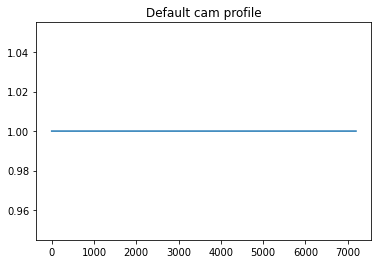

In [3]:
plt.plot(cam.profile)
plt.title("Default cam profile")
plt.show()

Now we apply a new profile in the segment from 45 to 90 degrees.

We apply a polynomial fitted for $(0,1), (1,1), (2,2), (3,1)$ with degree 2.

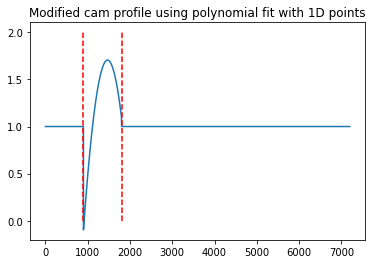

In [4]:
new_profile = np.array([0, 1, 2, 1])
cam.set_profile_polynomial_with_points(new_profile, start=45, end=90, degree=2)
plt.plot(cam.profile)
plt.title("Modified cam profile using polynomial fit with 1D points")
plt.vlines(x=45/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.vlines(x=90/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.show()

Now we apply a new profile in the segment from 90 to 135 degrees. 

We apply a polynomial fitted for $(2,1), (3,-1), (8,1)$ with degree 3.

c:\Users\jiyug\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


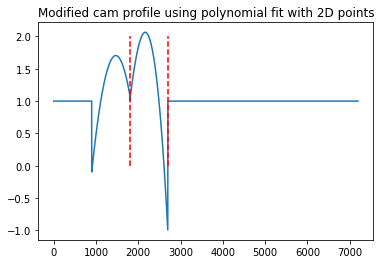

In [5]:
new_profile = np.array([[2,1], [3,2], [4,-1]])
cam.set_profile_polynomial_with_points(new_profile, start=90, end=135, degree=3)
plt.plot(cam.profile)
plt.title("Modified cam profile using polynomial fit with 2D points")
plt.vlines(x=90/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.vlines(x=135/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.show()

Now we apply a new profile in the segment from 135 to 180 degrees.

We apply the curve $y = 4x^3 + 2x^2 - 3x - 2, x \in [-1, 1]$.

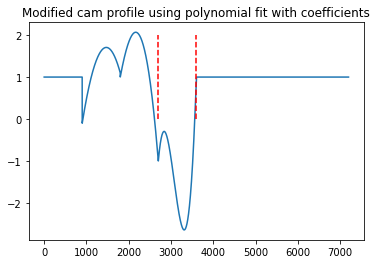

In [6]:
coefficients = np.array([-2, -3, 2, 4]) 
cam.set_profile_polynomial_with_coefficients(coefficients, cam_start=135, cam_end=180, x_start=-1, x_end=1)
plt.plot(cam.profile)
plt.title("Modified cam profile using polynomial fit with coefficients")
plt.vlines(x=135/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.vlines(x=180/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.show()

Now we apply a new profile in the segment from 180 to 235 degrees.

We apply a curve with straight segments that fit through $(0,0), (1,1), (2,-1), (3,1), (4,0)$.

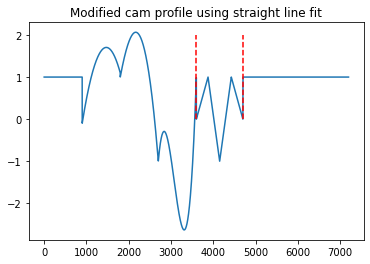

In [7]:
new_profile = np.array([0, 1, -1, 1, 0])
cam.set_profile_with_straight_lines(new_profile, start=180, end=235)
plt.plot(cam.profile)
plt.title("Modified cam profile using straight line fit")
plt.vlines(x=180/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.vlines(x=235/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.show()

Now we apply a new profile in the segment from 235 to 270 degrees.

We apply a curve with straight line segments that fit through $(1,1), (3,-1), (4,0)$.

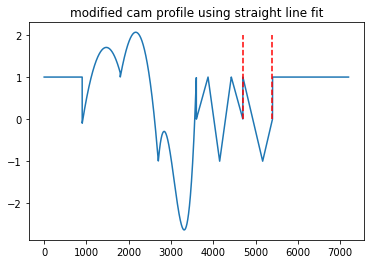

In [8]:
new_profile = np.array([[1,1], [3,-1], [4,0]])
cam.set_profile_with_straight_lines(new_profile, start=235, end=270)
plt.plot(cam.profile)
plt.title("modified cam profile using straight line fit")
plt.vlines(x=235/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.vlines(x=270/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.show()

Now we apply a new profile in the segment from 270 to 360 degrees.

We apply a sine curve with 8 straight segments.

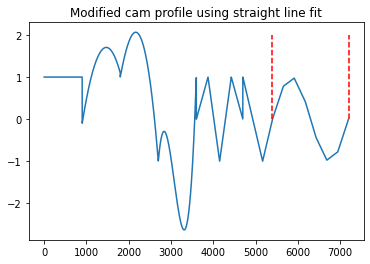

In [9]:
n = 8
x = sp.symbols("x")
equation = sp.sin(x)
t = np.linspace(start=0, stop=2*np.pi, num=n)
y = np.zeros((n))
for i in range(n):
    y[i] = equation.subs(x, t[i])
new_profile = np.array([np.arange(n), y]).transpose()
cam.set_profile_with_straight_lines(new_profile, start=270, end=360)
plt.plot(cam.profile)
plt.title("Modified cam profile using straight line fit")
plt.vlines(x=270/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.vlines(x=360/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.show()

Now we apply a new profile in the segment from 0 to 45 degrees.

We apply a sine curve using a function.

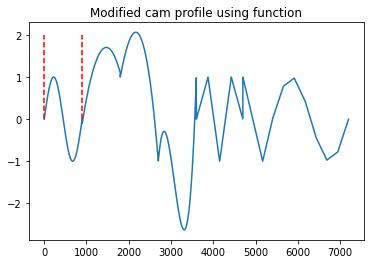

In [10]:
x = sp.symbols("x")
fun = sp.sin(x)
cam.set_profile_with_function(
    function=fun,
    variable=x,
    function_start=0,
    function_end=2*sp.pi,
    cam_start=0,
    cam_end=45
)
plt.plot(cam.profile)
plt.title("Modified cam profile using function")
plt.vlines(x=0, ymin=0, ymax=2, colors='red', linestyles='--')
plt.vlines(x=45/360*SIZE, ymin=0, ymax=2, colors='red', linestyles='--')
plt.show()

Now we smoothen the curve with a rolling average over 15 degeres of rotation 3 times.

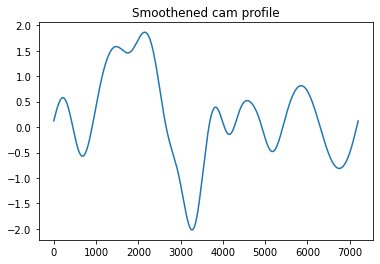

In [11]:
cam.rolling_average_smoothen(kernel_size_in_degrees=15, num_iterations=3)
plt.plot(cam.profile)
plt.title("Smoothened cam profile")
plt.show()

We can apply the rolling average a lot more times to further smoothen the curve.

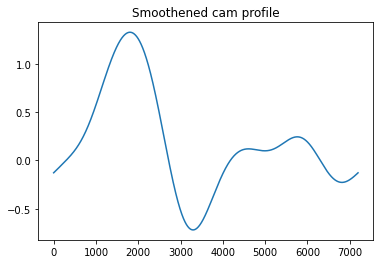

In [12]:
cam.rolling_average_smoothen(kernel_size_in_degrees=15, num_iterations=30)
plt.plot(cam.profile)
plt.title("Smoothened cam profile")
plt.show()